<a href="https://colab.research.google.com/github/yashwanth-854/ML-projects/blob/main/Loan_Status_Prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# importing the dependencies
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [6]:
# Data Collection and Processing
loan_dataset = pd.read_csv('/content/loan_dataset.csv')


In [7]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [8]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
loan_dataset.shape

(614, 13)

In [10]:
# getting statistical measures of the data
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
# finding the missing Values
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
loan_dataset=loan_dataset.dropna()

In [16]:
loan_dataset.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
loan_dataset.shape

(480, 13)

In [18]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [19]:
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [20]:
# replacing 3+ values to 4
loan_dataset=loan_dataset.replace(to_replace='3+',value=4)
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

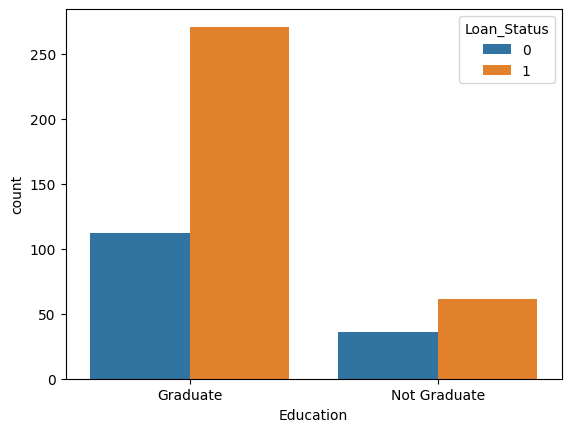

In [21]:
# Visualizing the Dataset
sns.countplot(x="Education",hue="Loan_Status",data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

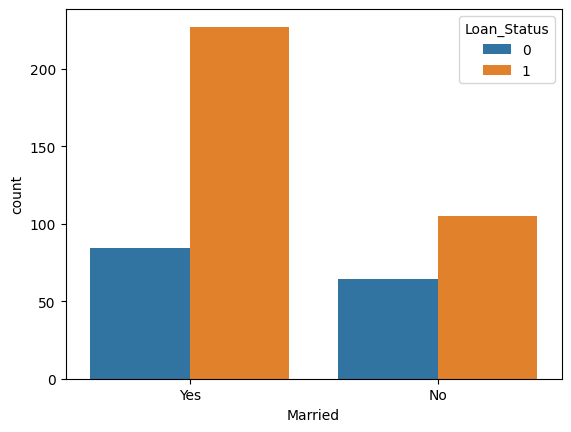

In [22]:
# martial status vs loan status
sns.countplot(x="Married",hue="Loan_Status",data=loan_dataset)

<Axes: xlabel='Gender', ylabel='count'>

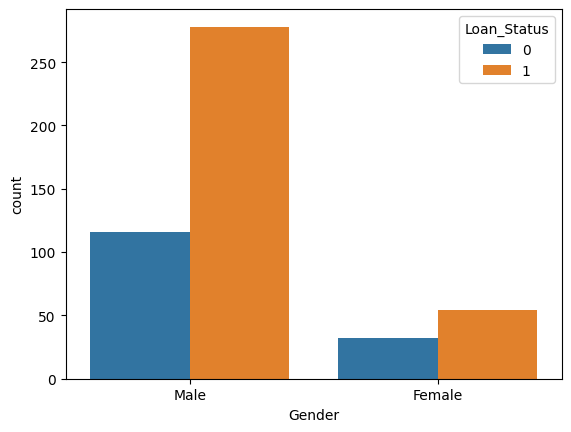

In [23]:
sns.countplot(x="Gender",hue="Loan_Status",data=loan_dataset)

<Axes: xlabel='Property_Area', ylabel='count'>

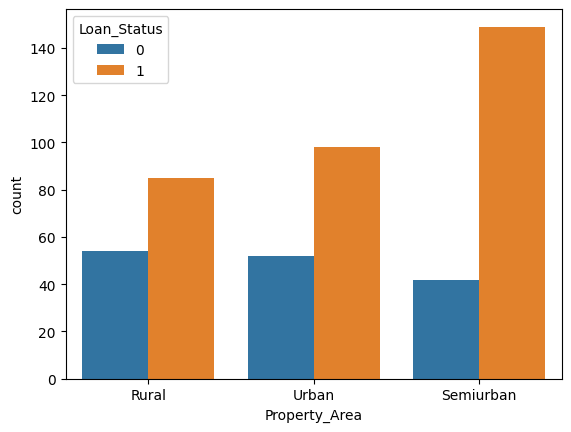

In [24]:
sns.countplot(x="Property_Area",hue="Loan_Status",data=loan_dataset)

In [26]:
# Converting Categorical data to Numerical data
loan_dataset.replace({"Education":{'Graduate':1,'Not Graduate':0},"Gender":{'Male':1,'Female':0},"Property_Area":{'Rural':0,'Semiurban':1,'Urban':3},
                     "Self_Employed":{'No':0,'Yes':1},"Married":{'No':0,'Yes':1}},inplace=True)

In [27]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,3,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,3,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,3,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,3,1


In [29]:
X=loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=loan_dataset['Loan_Status']
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [30]:
# spliting data into test and train dat
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2,stratify=Y)
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


In [31]:
classifier=svm.SVC(kernel='linear')

In [32]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [33]:
# model Evaluation
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)

In [34]:
print(training_data_accuracy)

0.8009259259259259


In [35]:
X_test_prediction=classifier.predict(X_test)
testing_data_accuracy=accuracy_score(Y_test,X_test_prediction)

In [36]:
print(testing_data_accuracy)

0.8333333333333334


In [39]:
# Building an predictive system
# use only after converting the required categorical values into numerical values
input_data=(1,1,0,0,0,7660,0,104,360,0,2)
input_data_asarray=np.asarray(input_data)
input_array_reshaped=input_data_asarray.reshape(1,-1)
prediction=classifier.predict(input_array_reshaped)
if(prediction[0]==1):
  print("Loan will be approved")
else:
  print("Loan will not be approved")


Loan will not be approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
